### Анализ датасета

Загрузим датасет и посмотрим на его размер

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('flight_delays_train.csv')
print(data.shape)
data

(100000, 9)


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


Посмотрим на данные, которые являются категориальными и численными

In [224]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Категориальные данные:', categorical_columns)
print('Численные данные:', numerical_columns)

Категориальные данные: ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'dep_delayed_15min']
Численные данные: ['DepTime', 'Distance']


Категориальные данные можно разделить на 2 типа:  
(1) Поряковые: 'Month', 'DayofMonth', 'DayOfWeek'  
(2) Непорядковые: 'UniqueCarrier', 'Origin', 'Dest', 'dep_delayed_15min'(таргет)  

Теперь посмотрим, как распределены наши данные

In [225]:
data[categorical_columns].describe()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,dep_delayed_15min
count,100000,100000,100000,100000,100000,100000,100000
unique,12,31,7,22,289,289,2
top,c-8,c-1,c-4,WN,ATL,ATL,N
freq,8830,3399,14736,15082,5834,5795,80956


Отметим, количество уникальных значений для непорядковых категориальных переменных, оно достаточно большое, что впоследующим может привести к большому количеству признаков при использовании метода кодирования pd.get_dummies

In [226]:
data[numerical_columns].describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


Отметим, что максимальное время указано как 25:34, что видимо является ошибкой, поэтому ниже более детально посмотрим на DepTime

Убедимся, что в датасете отсутствуют пропущенные значения:

In [227]:
data.count(axis=0)

Month                100000
DayofMonth           100000
DayOfWeek            100000
DepTime              100000
UniqueCarrier        100000
Origin               100000
Dest                 100000
Distance             100000
dep_delayed_15min    100000
dtype: int64

#### Исправление ошибок

Вернемся к DepTime и разделим его на часы и минуты

In [228]:
data['HourDepTime']=data['DepTime'].map(lambda x: str(x)[:-2])
print('Уникальные часы:',data['HourDepTime'].unique())

data['MinutesDepTime']=data['DepTime'].map(lambda x: str(x)[-2:])
print('Уникальные минуты:',data['MinutesDepTime'].unique())

Уникальные часы: ['19' '15' '14' '10' '18' '7' '6' '20' '17' '12' '21' '16' '9' '13' '11'
 '23' '8' '5' '22' '' '4' '2' '24' '1' '3' '25']
Уникальные минуты: ['34' '48' '22' '15' '28' '18' '54' '35' '29' '36' '05' '24' '37' '47'
 '42' '01' '20' '04' '21' '19' '17' '50' '13' '10' '27' '30' '53' '03'
 '46' '07' '44' '23' '00' '09' '25' '16' '12' '55' '51' '31' '58' '45'
 '32' '57' '56' '14' '52' '11' '26' '06' '41' '43' '40' '33' '02' '38'
 '08' '59' '49' '39' '5' '2' '7' '3' '4' '8' '6' '1' '9']


Видим, что в уникальные часы входят как пустые значения '', так и 24 и 25.
Приведем все эти значения к 0.

In [229]:
data['HourDepTime'].replace(['25','24',''],[0,0,0],inplace=True)

Соберем теперь данные по часам и минутам вместе в одну переменную

In [230]:
data['DepTimeCorrect'] = data['HourDepTime'].astype(str) + data['MinutesDepTime'].astype(str)
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,HourDepTime,MinutesDepTime,DepTimeCorrect
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,19,34,1934
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,15,48,1548
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,14,22,1422
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,10,15,1015
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,18,28,1828
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N,16,18,1618
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N,8,04,804
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N,19,01,1901
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N,15,15,1515


In [231]:
data['DepTimeCorrect']=data['DepTimeCorrect'].astype(int)
data['HourDepTime']=data['HourDepTime'].astype(int)
data['MinutesDepTime']=data['MinutesDepTime'].astype(int)

#### Анализ зависимости численных и порядковых категориальных перменных с target

Добавим в датасет копию target, где N,Y, заменено на 0 и 1, нам это понадобиться для анализа зависимости.

In [232]:
data['01_dep_delayed_15min'] = data['dep_delayed_15min']
data['01_dep_delayed_15min'].replace(['N','Y'],[0,1],inplace=True)

<AxesSubplot:xlabel='MinutesDepTime', ylabel='01_dep_delayed_15min'>

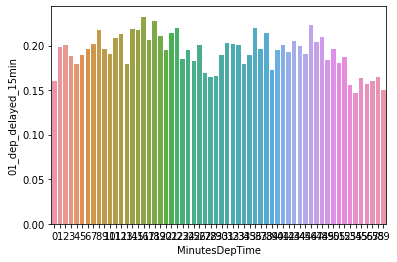

In [233]:
sns.barplot(x='MinutesDepTime', y='01_dep_delayed_15min', data=data, ci=None)

На диаграмме выше, визуально какой-либо зависимости между Минутами вылета и временем задержки не видно.

<AxesSubplot:xlabel='HourDepTime', ylabel='01_dep_delayed_15min'>

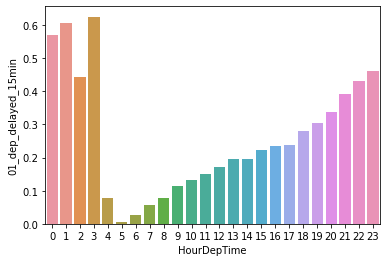

In [234]:
sns.barplot(x='HourDepTime', y='01_dep_delayed_15min', data=data, ci=None)

###### Здесь определенно видна линейная зависимость, начиная с 5 утра относительное колчичество задержек рейсов растет и достигает максимума в 0-3 ночи.  
Однако, нам нужно еще посмотреть, на количество рейсов в указанные часы

<AxesSubplot:>

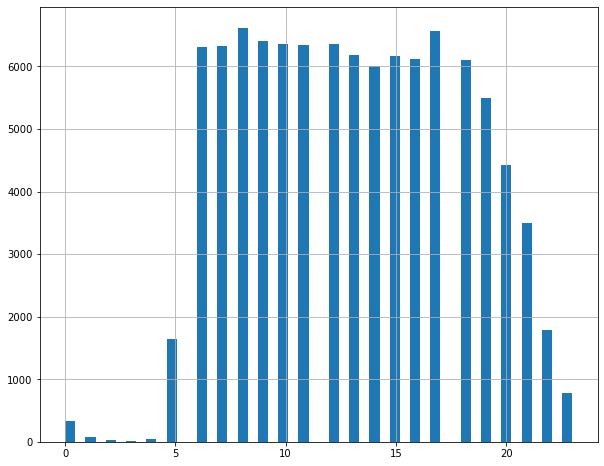

In [235]:
data['HourDepTime'].hist(bins=50 , figsize=(10,8))

Видим, что количество рейсов в период с 0 до 5 утра небольшое, тем ни менее в период с 6 утра до 21 рейсы распределены примерно равномерно и линейная зависимость (из графика выше) с количествои задержек рейсов для них актуальна.

Проверим умозаключения посмотрев на корреляцию нескольких признаков. Видим, что есть коррелиция между таргетом и Часами вылета рейса.

<AxesSubplot:>

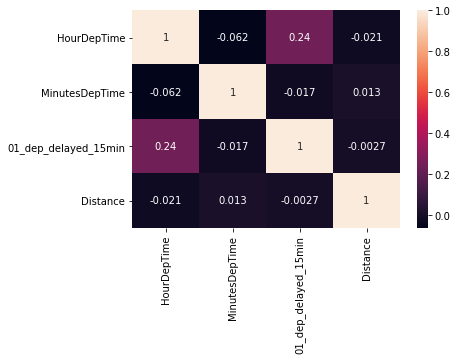

In [236]:
sns.heatmap(data[['HourDepTime', 'MinutesDepTime', '01_dep_delayed_15min','Distance']].corr(), annot=True)

Посмторим теперь на корреляцию таргета с 'Month', 'DayofMonth', 'DayOfWeek'.  
Для этого преобразуем их в численные значения

In [237]:
data['Month']=data['Month'].map(lambda x: str(x)[2:])
data['DayofMonth']=data['DayofMonth'].map(lambda x: str(x)[2:])
data['DayOfWeek']=data['DayOfWeek'].map(lambda x: str(x)[2:])

data['Month']=data['Month'].astype(int)
data['DayofMonth']=data['DayofMonth'].astype(int)
data['DayOfWeek']=data['DayOfWeek'].astype(int)

<AxesSubplot:>

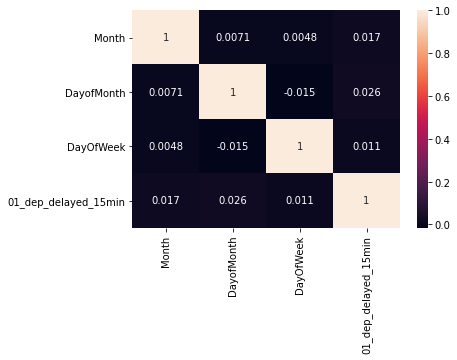

In [238]:
sns.heatmap(data[['Month','DayofMonth','DayOfWeek','01_dep_delayed_15min']].corr(method='spearman'), annot=True)

Для категориальных порядковых переменных мы использовали расчет корреляции методом Спирмена, видим, что зависимость между рассматриваемыми переменнами не может быть описана монотонной функцией.

#### Анализ зависимости непорядковых категориальных перменных с target

Перейдем к рассмотрению непорядковых переменных: 'UniqueCarrier', 'Origin', 'Dest' используя метод хи-квадрат.

Напишем функцию для хи-квадрат

In [280]:
def chi_square(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
  
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

Применим ее для непорядковых переменных: 'UniqueCarrier', 'Origin', 'Dest'

In [290]:
chi_score, degree_f, p = chi_square(data,'UniqueCarrier','dep_delayed_15min')
print('UniqueCarrier vs dep_delayed_15min')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

chi_score, degree_f, p = chi_square(data,'Origin','dep_delayed_15min')
print('Origin vs dep_delayed_15min')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

chi_score, degree_f, p = chi_square(data,'Dest','dep_delayed_15min')
print('Dest vs dep_delayed_15min')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

UniqueCarrier vs dep_delayed_15min
Chi2_score: 621.4838656228629, Degrees of freedom: 21, p-value: 4.823859561648255e-118

Origin vs dep_delayed_15min
Chi2_score: 1249.2827484092522, Degrees of freedom: 288, p-value: 1.055801126790327e-119

Dest vs dep_delayed_15min
Chi2_score: 1097.332222137806, Degrees of freedom: 288, p-value: 9.620779192833563e-95



Видим, что для всех переменных p-value значительно ниже 0,05. Следовательно переменные 'UniqueCarrier', 'Origin', 'Dest' коррелируют с target.  
Посмотрим как выглядит эта взаимосвящь на примере UniqueCarrier

<AxesSubplot:xlabel='dep_delayed_15min', ylabel='UniqueCarrier'>

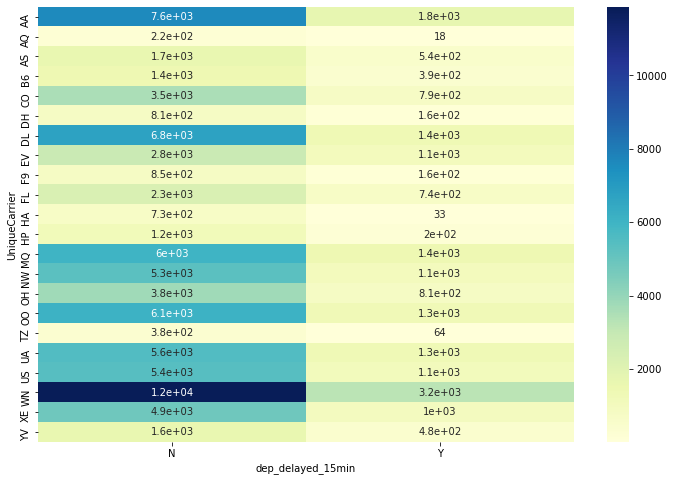

In [291]:
contigency = pd.crosstab(data['UniqueCarrier'], data['dep_delayed_15min'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

Видим, что по некоторым кодам авиакомпаний (UniqueCarrier) есть значительное преоблажание в сторону отсутствия задержки рейса

В следующем блокноте перейдем к обучению модели